In [52]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

Read the Data set and check the data in the ddata set.

In [53]:

blr=pd.read_csv('./Banglore_traffic_Dataset.csv')
blr.columns=blr.columns.str.lower()
blr.head()

,date,area name,road/intersection name,traffic volume,average speed,travel time index,congestion level,road capacity utilization,incident reports,environmental impact,public transport usage,traffic signal compliance,parking usage,pedestrian and cyclist count,weather conditions,roadwork and construction activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


Understand the data types and the NULL values if any in the coulmns 

In [54]:
blr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                8936 non-null   object 
 1   area name                           8936 non-null   object 
 2   road/intersection name              8936 non-null   object 
 3   traffic volume                      8936 non-null   int64  
 4   average speed                       8936 non-null   float64
 5   travel time index                   8936 non-null   float64
 6   congestion level                    8936 non-null   float64
 7   road capacity utilization           8936 non-null   float64
 8   incident reports                    8936 non-null   int64  
 9   environmental impact                8936 non-null   float64
 10  public transport usage              8936 non-null   float64
 11  traffic signal compliance           8936 no

Date is an object type. Change it to date type for easier analytical performances.

In [55]:
blr['date']=pd.to_datetime(blr['date'],format='%Y-%m-%d')
blr['day']=blr['date'].dt.day_name() #adding extra column to save the day of the week

blr['month']=blr['date'].dt.month_name() #seperating the month into a seperate column

blr['year']=blr['date'].dt.year

In [56]:
blr.head()

,date,area name,road/intersection name,traffic volume,average speed,travel time index,congestion level,road capacity utilization,incident reports,environmental impact,public transport usage,traffic signal compliance,parking usage,pedestrian and cyclist count,weather conditions,roadwork and construction activity,day,month,year
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,Saturday,January,2022
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,Saturday,January,2022
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,Saturday,January,2022
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,Saturday,January,2022
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,Saturday,January,2022


In [57]:
#bringing the day, monthand year columns from the last to after date for easy readability 
cols=blr.columns.tolist()
last_col=cols.pop() #myear column
cols.insert(1,last_col)
blr=blr[cols]

cols=blr.columns.tolist()
last_col=cols.pop() #month column
cols.insert(1,last_col)
blr=blr[cols]
blr.head()

cols=blr.columns.tolist()
last_col=cols.pop() #day column
cols.insert(1,last_col)
blr=blr[cols]
blr.head()

,date,day,month,year,area name,road/intersection name,traffic volume,average speed,travel time index,congestion level,road capacity utilization,incident reports,environmental impact,public transport usage,traffic signal compliance,parking usage,pedestrian and cyclist count,weather conditions,roadwork and construction activity
0,2022-01-01,Saturday,January,2022,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Saturday,January,2022,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Saturday,January,2022,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Saturday,January,2022,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Saturday,January,2022,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


Check the data types of the columns once more to make sure 

In [58]:
blr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                8936 non-null   datetime64[ns]
 1   day                                 8936 non-null   object        
 2   month                               8936 non-null   object        
 3   year                                8936 non-null   int32         
 4   area name                           8936 non-null   object        
 5   road/intersection name              8936 non-null   object        
 6   traffic volume                      8936 non-null   int64         
 7   average speed                       8936 non-null   float64       
 8   travel time index                   8936 non-null   float64       
 9   congestion level                    8936 non-null   float64       
 10  road capacity utilizatio

Check the object type columns for distinct values to see if there are any outliers or mistakes

In [59]:
blr.where(blr.year == 2024).month.unique()

array([nan, 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August'], dtype=object)

year 2024 has some of the months missing therefore we can remove that particular data

In [60]:
blr = blr[blr.year != 2024]
blr["year"].unique()

array([2022, 2023])

In [61]:
blr["area name"].unique()

array(['Indiranagar', 'Whitefield', 'Koramangala', 'M.G. Road',
       'Jayanagar', 'Hebbal', 'Yeshwanthpur', 'Electronic City'],
      dtype=object)

In [62]:
blr["road/intersection name"].unique()

array(['100 Feet Road', 'CMH Road', 'Marathahalli Bridge',
       'Sony World Junction', 'Sarjapur Road', 'Trinity Circle',
       'Anil Kumble Circle', 'Jayanagar 4th Block', 'South End Circle',
       'Hebbal Flyover', 'Ballari Road', 'Yeshwanthpur Circle',
       'Tumkur Road', 'ITPL Main Road', 'Silk Board Junction',
       'Hosur Road'], dtype=object)

In [63]:
blr["weather conditions"].unique()

array(['Clear', 'Overcast', 'Fog', 'Rain', 'Windy'], dtype=object)

In [64]:
blr["roadwork and construction activity"].unique()

array(['No', 'Yes'], dtype=object)

All the object type columns are clear

# VISUAL ANALYSIS

### Congestion VS day of the week

In [65]:
day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
blr['day'] = pd.Categorical(blr['day'], categories=day_order, ordered=True)
blr.head()

grouped_data = blr.groupby('day', observed=False)['congestion level'].sum()

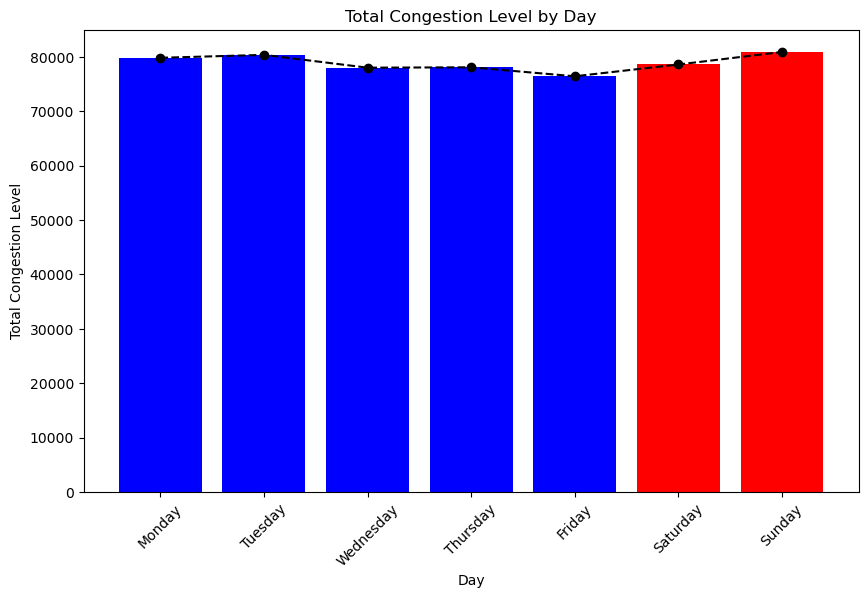

In [66]:
colors = ['blue','blue','blue','blue','blue','red','red']  # Initialize all colors to blue
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values,color=colors)
plt.xlabel('Day')
plt.ylabel('Total Congestion Level')
plt.title('Total Congestion Level by Day')
plt.xticks(rotation=45)
plt.plot(grouped_data.index, grouped_data.values,linestyle='--',color='black',marker='o')
plt.show()

There is no significant change in congestion levels depending on the day of the week.

### Congestion VS seasons

In [67]:
month_categories=['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
blr.month = pd.Categorical(blr.month, categories = month_categories, ordered = True)

month_group = blr.groupby("month", observed = False)["congestion level"].sum()
month_group

month
January      45768.520727
February     41048.362101
March        48288.327164
April        43514.147432
May          45821.793003
June         45566.426909
July         47890.622410
August       49190.375044
September    44803.757750
October      48868.907015
November     47238.858825
December     44069.336498
Name: congestion level, dtype: float64

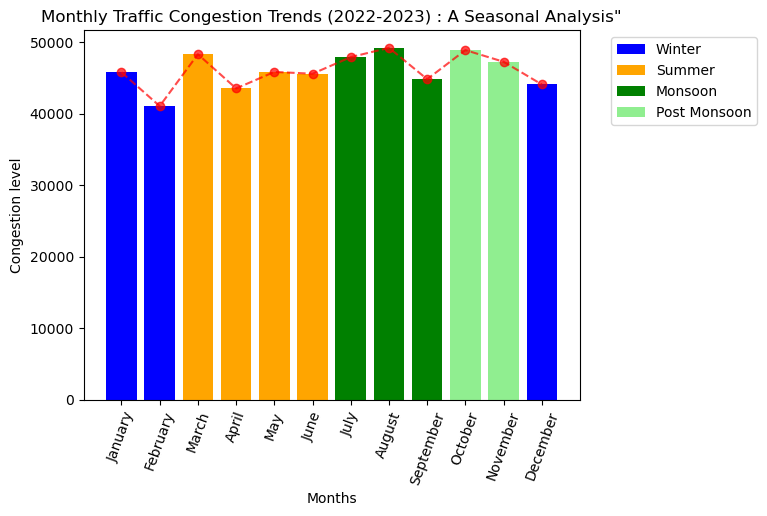

In [68]:
from matplotlib.patches import Patch

m_color=['blue','blue','orange','orange','orange','orange','green','green','green','lightgreen','lightgreen']

plt.bar(month_group.index,month_group.values,color=m_color)
plt.plot(month_group.index,month_group.values,linestyle="--",color='red',marker='o',alpha=0.7)
plt.xticks(rotation=70)
plt.xlabel('Months')
plt.ylabel('Congestion level')
plt.title('Monthly Traffic Congestion Trends (2022-2023) : A Seasonal Analysis"')
legend_elements = [Patch(facecolor='blue', label='Winter'),
                   Patch(facecolor='orange', label='Summer'),
                   Patch(facecolor='green', label='Monsoon'),
                   Patch(facecolor='lightgreen', label='Post Monsoon')]

# Add the legend to the plot
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
#month_grp = month_grp.sort_index()
plt.show()


**Key Insights :**
>***Seasonal Variation:*** The graph suggests that congestion is lowest during the Winter months and highest during the Summer and Monsoon seasons. This could be due to weather conditions, holidays, or other seasonal factors that affect traffic patterns.

>***Summer:*** The beginning of summer sees an increase in congestion. this could be due to the beginning of the holiday season and vacations leading to a lot more travel.

>***Monsoon:*** The Monsoon season shows high but steady congestion, which could be influenced by weather conditions such as rain, leading to slower traffic movement and bad road conditions due to the rains.

### Weather conditions VS congestion

In [83]:
fig = px.histogram(blr, x='weather conditions', y='traffic volume', color='area name', 
                   barmode='stack', title="Traffic Volume by Weather Conditions")
fig.show()

Clear weather conditions see higher traffic volumes across all areas, indicating that weather has a significant impact on road usage, with adverse conditions potentially reducing traffic.

### Road Capacity VS COngestion

In [91]:
fig = px.histogram(blr, x='road capacity utilization', nbins=20,
                   title="Histogram of Road Capacity Utilization")
fig.show()

The current roads are being utilized to the maximum. It indicates that the current infrastructure is not sufficient to contain the traffic levels.

### Region VS congestion

In [79]:
fig = px.sunburst(blr, path=['area name', 'road/intersection name'], values='traffic volume',
                  title="Sunburst Chart of Traffic Volume by Area, Road, and Intersection")
fig.show()

This heatmap reveals that certain areas, such as Koramangala, Indiranagar and M.G Road, have consistently higher traffic volumes across multiple roads. This indicates that these regions are significant traffic hubs and within these areas, specific roads such as Sony World Junction and 100 feet road dominate traffic volume, indicating key pressure points in these locations

In [81]:
fig = px.box(blr, x='area name', y='travel time index', 
             title="Box Plot of Travel Time Index by Area")
fig.show()

Koramangala shows a higher spread in the Travel Time Index, indicating variability in travel efficiency. This suggests that travel times in Koramangala and M.G Road are less predictable, likely due to varying traffic conditions.

### Incident Reports VS Region names

In [100]:
incident_data = blr.groupby('area name')['incident reports'].sum().reset_index()
fig = px.pie(incident_data, values='incident reports', names='area name',
             title="Incident Reports by Area")
fig.show()


Indiranagar, M.G. Road and Koramangala account for a significant portion of traffic incidents, suggesting these areas might need more traffic management and safety measures. These high number of reports and the high traffic congestion in the same areas means they might be corellated.

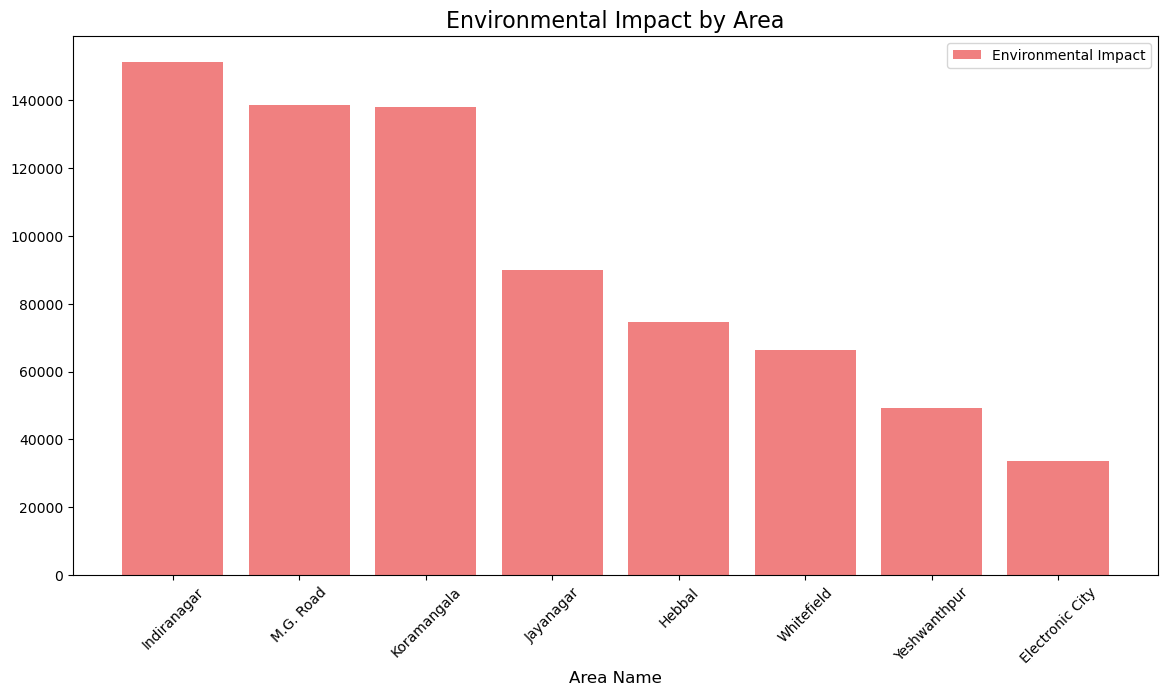

In [109]:


areas=['Indiranagar', 'M.G. Road', 'Koramangala', 'Jayanagar','Hebbal', 'Whitefield', 'Yeshwanthpur', 'Electronic City']
blr['area name']=pd.Categorical(blr['area name'],categories=areas,ordered=True)

area_grp2 = blr.groupby('area name', observed=False)[['public transport usage', 'environmental impact']].sum()


ptu=area_grp2.values[:,0]
ei=area_grp2.values[:,1]

# Plotting the data
plt.figure(figsize=(14, 7))

# Bar chart for Road Capacity Utilization (stacked on top)
plt.bar(area_grp2.index,ei, color='lightcoral', label='Environmental Impact')

# Adding titles and labels
plt.title('Environmental Impact by Area', fontsize=16)
plt.xlabel('Area Name', fontsize=12)
plt.xticks(rotation=45)  # Rotating x labels for better readability

# Adding a legend
plt.legend()

# Display the plot
plt.show()

Indiranagar, M.G Road and Koramangala have the highest environmental imapct as expected.

## KEY OBSERVATIONS

The monsoon and summer have the highest road congestions and weather conditions play a key role in the traffic voluem, where adverse weather conditions might lead to lesser traffic conditions.

Kormangala, M.G. Road and Indiranagar are the main concern areas with the worst traffic congestions in the city.

These areas also have the highest number of reported traffic incidents and the highest environmental impact. Whichm leads to the conclusion that the traffic management in these areas is very poor there is a huge margin of improvement.

Also, the current road infrastructure in the city is being utilized to the maximum and this still leads to major traffic congestions, that means that the infrastructure in the city needs to be developed further and Koramangala, Inderanagar and M.G. Road can be the starting points.
